In [126]:
import sqlite3                    
import pandas as pd
import numpy as np       
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
#plt.rcdefaults()

In [16]:
conn = sqlite3.connect(r'C:\Users\ayush\Desktop\WOGCC\PowderRivercsv\PowderDb.sqlite')
cur = conn.cursor()

In [23]:
cur = conn.execute('SELECT * from Production')

- https://sqlite.org/docs.html
- https://sqlite.org/optoverview.html

In [24]:
# SQL Query - Entire data from database converted to a dataframe
data = pd.read_sql_query(''' SELECT * FROM Production;''', conn)
print(data.head(10))
print (data.shape)

index_data = data.index
print(index_data)
col = data.columns
print(col)

    Apino                 Wellname  County                       Company  \
0  305030  SPENCE DOME B-019946 14       3           ENDEAVOR ENERGY LLC   
1  305036                COZZENS 4       3          MERIT ENERGY COMPANY   
2  305037                COZZENS 3       3          MARATHON OIL COMPANY   
3  305040             C LINDSAY 1H       3          MERIT ENERGY COMPANY   
4  305040             C LINDSAY 1H       3          MERIT ENERGY COMPANY   
5  305058           AJAX 0-11185 3       3     WASHAKIE ENERGIES COMPANY   
6  305061        WY State 0-3593 1       3  LEGACY RESERVES OPERATING LP   
7  305062                   AJAX 2       3     WASHAKIE ENERGIES COMPANY   
8  305063                 MENGER 3       3  LEGACY RESERVES OPERATING LP   
9  305072           STATE 0-4198 2       3  LEGACY RESERVES OPERATING LP   

    Field_Name Horiz_Dir  Sec  Twp T_Dir  Rge    ...     Gravity03 Gravity04  \
0  SPENCE DOME         N    9   54     N   94    ...          19.0      20.0   
1  

(350370, 79)

In [34]:
data2 = pd.read_sql_query('''
                SELECT Apino, Wellname, Field_name, Jan_oil, Feb_oil
                FROM Production 
                ORDER BY Jan_Oil DESC;''', conn)
data2.head(10)

,Apino,Wellname,Field_Name,Jan_oil,Feb_oil
0,929103,ARBALEST 245-3304H,CROSSBOW,38611,23035
1,562074,DILTS 44-14 TH,K-BAR,36664,25440
2,929117,MARYS DRAW 26-0310H,MARY DRAW,34776,21081
3,562629,T COSNER FED 204372-2PH,HOUSE CREEK,34468,20922
4,929488,MARYS DRAW 455-0310H,WC,34402,26677
5,1930109,CLOVER FED 4177-12-1-1FH,CRAWFORD DRAW,34182,26499
6,561926,IBERLIN RANCH FED 044176-1XFH,PINE TREE,34161,44710
7,929033,ARBALEST 436-3304H,CROSSBOW,33680,18885
8,935214,WERNER FED 13-123669-1XTPH,WC,32744,44178
9,928417,FEDERAL 16-10/3FH,WC,31290,23508


In [151]:
data3 = pd.read_sql_query('''
                        SELECT Apino, Yr, Wellname, Field_name, Jan_oil, Feb_oil, Mar_oil 
                        FROM Production
                        WHERE Yr = '2007'
                        ORDER BY Jan_oil DESC
                        LIMIT 25;''', conn)
data3

,Apino,Yr,Wellname,Field_Name,Jan_oil,Feb_oil,Mar_oil
0,505491,2007,F E COOK 5,TIMBER CREEK,10333,8404,9889
1,524759,2007,F E COOK 2-9,TIMBER CREEK,8181,6922,7490
2,550277,2007,BALLARD CUNDY 22-21,WC,7887,7046,7419
3,523490,2007,NORTH SLATTERY UNIT 44-24,SLATTERY,7578,6468,7306
4,553436,2007,LONGREACH STATE 44-36,UPPER DUCK CREEK,6070,3567,4668
5,557556,2007,5-13 DRU,DUVALL RANCH,6060,3450,6286
6,524702,2007,LACOY 12-19,BIG HAND,6029,5096,5201
7,928064,2007,CHINOOK FEDERAL 1,CRAWFORD DRAW,5532,4325,5646
8,528795,2007,SIMPSON 23-12,TERRACE,5006,4435,4962
9,557130,2007,SLPU FED 12-30H,HOUSE CREEK,4871,4406,4151


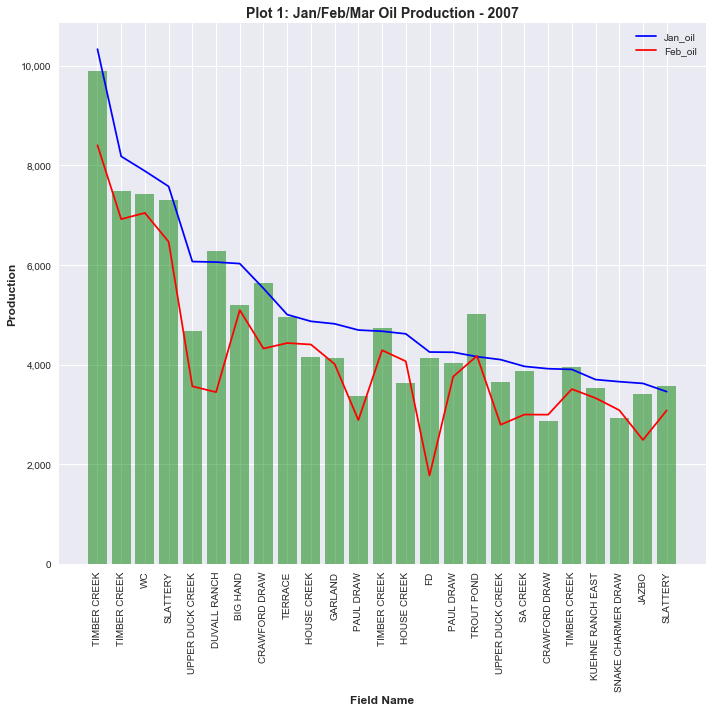

In [162]:
fig, ax = plt.subplots()
axes = plt.gca()
x = np.arange(len(data3['Field_Name']))
y = data3['Jan_oil']
y2 = data3['Feb_oil']
y3 = data3['Mar_oil']
x_name = data3['Field_Name']

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.subplots_adjust(top=0.85)
ax.set_title('Plot 1: Jan/Feb/Mar Oil Production - 2007', fontsize=14, fontweight='bold')
ax.set_xlabel('Field Name', fontsize = 12, fontweight='bold')
ax.set_ylabel('Production', fontsize = 12, fontweight='bold')
plt.grid = False
plt.xticks(x,x_name, rotation=90)
fig.set_size_inches(10, 10)
ax.plot(x,y, color = 'b')
ax.plot(x,y2,color = 'r')
ax.bar(x,y3,align='center', alpha=0.5, color = 'g')
plt.tight_layout()
plt.legend()
plt.show()

In [164]:
data4 = pd.read_sql_query('''
            SELECT Yr, Sum(Jan_oil), Sum(Feb_oil), Sum(Mar_oil), Sum(Apr_oil), Sum(May_oil), Sum(Jun_oil), 
            Sum(Jul_oil), Sum(Aug_oil), Sum(Sep_oil), Sum(Oct_oil), Sum(Nov_oil), Sum(Dec_oil)
            FROM Production
            GROUP BY Yr
            ;''', conn)
data4

,Yr,Sum(Jan_oil),Sum(Feb_oil),Sum(Mar_oil),Sum(Apr_oil),Sum(May_oil),Sum(Jun_oil),Sum(Jul_oil),Sum(Aug_oil),Sum(Sep_oil),Sum(Oct_oil),Sum(Nov_oil),Sum(Dec_oil)
0,2007,1326239,1188124,1322765,1304627,1320825,1278971,1300917,1307869,1273269,1310847,1264613,1251896
1,2008,1237382,1180513,1257333,1222345,1224562,1197665,1236779,1239532,1194034,1230154,1196601,1178102
2,2009,1194257,1097554,1145185,1126514,1179618,1118256,1142731,1156972,1132562,1173762,1160225,1114585
3,2010,1155913,1074388,1226175,1166295,1212212,1207464,1257135,1257911,1258566,1285737,1207490,1270039
4,2011,1234705,1154633,1321643,1327889,1366076,1340407,1381504,1362753,1329055,1418733,1423912,1536782
5,2012,1503088,1476358,1600834,1476911,1556794,1492375,1695403,1725623,1675016,1715639,1751866,1837627
6,2013,1840302,1784481,2095033,2000760,2166897,2125338,2051077,2348964,2356994,2352993,2406536,2340212
7,2014,2509743,2320644,2743999,2746090,2971616,3005564,3134516,3363402,3337196,3642045,3353902,3698856
8,2015,3837345,3531656,4171639,4160283,4107121,3823593,3894225,3839443,3583268,3733573,3580201,3680590
9,2016,3433903,3096883,3215977,2952157,2893941,2686663,2868696,2786737,2584337,2757465,2613300,2502541


In [144]:
data4 = data4[:11]
data4.columns

Index(['Yr', 'Sum(Jan_oil)', 'Sum(Feb_oil)', 'Sum(Mar_oil)', 'Sum(Apr_oil)',
       'Sum(May_oil)', 'Sum(Jun_oil)', 'Sum(Jul_oil)', 'Sum(Aug_oil)',
       'Sum(Sep_oil)', 'Sum(Oct_oil)', 'Sum(Nov_oil)', 'Sum(Dec_oil)'],
      dtype='object')

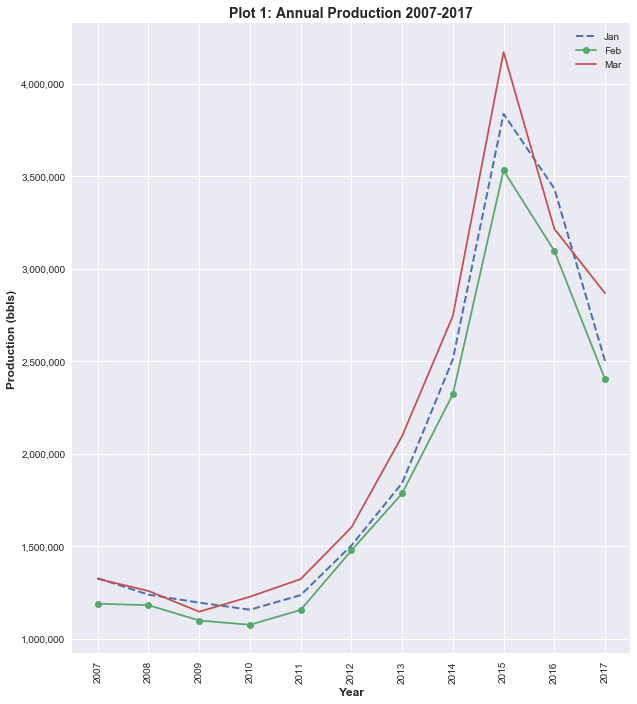

In [143]:
x = data4.Yr
x_name = data4.Yr
y1 = data4['Sum(Jan_oil)']
y2 = data4['Sum(Feb_oil)']
y3 = data4['Sum(Mar_oil)']

fig, ax = plt.subplots()
axes = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.subplots_adjust(top=1)
plt.grid = False
plt.xticks(x, x_name, rotation=90)
fig.set_size_inches(10, 10)

ax.set_title('Plot 1: Annual Production 2007-2017', fontsize=14, fontweight='bold')
plt.plot(x,y1, label = 'Jan', linestyle='dashed', linewidth=2)
plt.plot(x,y2, label = 'Feb', marker='o')
plt.plot(x,y3, label = 'Mar')
ax.set_xlabel('Year', fontsize = 12, fontweight='bold')
ax.set_ylabel('Production (bbls)', fontsize = 12, fontweight='bold')
plt.legend()


In [212]:
data5 = pd.read_sql_query('''
            SELECT Count(Jan_oil), Count(Feb_oil), Count(Mar_oil), Count(Apr_oil), Count(May_oil), Count(Jun_oil), 
            Count(Jul_oil), Count(Aug_oil), Count(Sep_oil), Count(Oct_oil), Count(Nov_oil), Count(Dec_oil)
            FROM Production
            GROUP BY Yr
            ;''', conn)
data5

,Count(Jan_oil),Count(Feb_oil),Count(Mar_oil),Count(Apr_oil),Count(May_oil),Count(Jun_oil),Count(Jul_oil),Count(Aug_oil),Count(Sep_oil),Count(Oct_oil),Count(Nov_oil),Count(Dec_oil)
0,33301,33301,33301,33301,33301,33301,33301,33301,33301,33301,33301,33301
1,35316,35316,35316,35316,35316,35316,35316,35316,35316,35316,35316,35316
2,35523,35523,35523,35523,35523,35523,35523,35523,35523,35523,35523,35523
3,35553,35553,35553,35553,35553,35553,35553,35553,35553,35553,35553,35553
4,34068,34068,34068,34068,34068,34068,34068,34068,34068,34068,34068,34068
5,32034,32034,32034,32034,32034,32034,32034,32034,32034,32034,32034,32034
6,29976,29976,29976,29976,29976,29976,29976,29976,29976,29976,29976,29976
7,28331,28331,28331,28331,28331,28331,28331,28331,28331,28331,28331,28331
8,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108
9,22915,22915,22915,22915,22915,22915,22915,22915,22915,22915,22915,22915


In [213]:
data5['Sum'] = data5.sum(axis=1)
data5

,Count(Jan_oil),Count(Feb_oil),Count(Mar_oil),Count(Apr_oil),Count(May_oil),Count(Jun_oil),Count(Jul_oil),Count(Aug_oil),Count(Sep_oil),Count(Oct_oil),Count(Nov_oil),Count(Dec_oil),Sum
0,33301,33301,33301,33301,33301,33301,33301,33301,33301,33301,33301,33301,399612
1,35316,35316,35316,35316,35316,35316,35316,35316,35316,35316,35316,35316,423792
2,35523,35523,35523,35523,35523,35523,35523,35523,35523,35523,35523,35523,426276
3,35553,35553,35553,35553,35553,35553,35553,35553,35553,35553,35553,35553,426636
4,34068,34068,34068,34068,34068,34068,34068,34068,34068,34068,34068,34068,408816
5,32034,32034,32034,32034,32034,32034,32034,32034,32034,32034,32034,32034,384408
6,29976,29976,29976,29976,29976,29976,29976,29976,29976,29976,29976,29976,359712
7,28331,28331,28331,28331,28331,28331,28331,28331,28331,28331,28331,28331,339972
8,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108,289296
9,22915,22915,22915,22915,22915,22915,22915,22915,22915,22915,22915,22915,274980


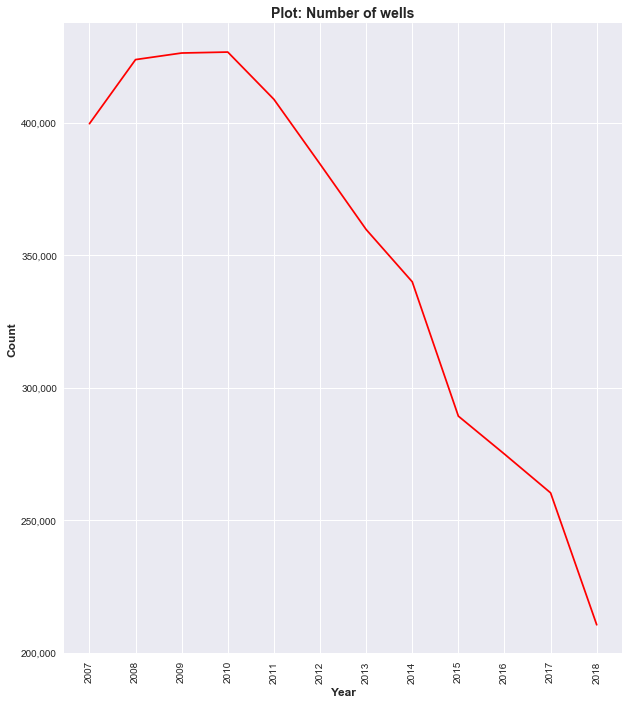

In [247]:
fig, ax = plt.subplots()
axes = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
fig.subplots_adjust(top=1)
plt.grid = False
plt.xticks(x, rotation=90)
fig.set_size_inches(10, 10)
ax.set_title('Plot: Number of wells', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize = 12, fontweight='bold')
ax.set_ylabel('Count', fontsize = 12, fontweight='bold')
x= np.arange(2007,2019)
y = data5.Sum
plt.plot(x,y,'r') 

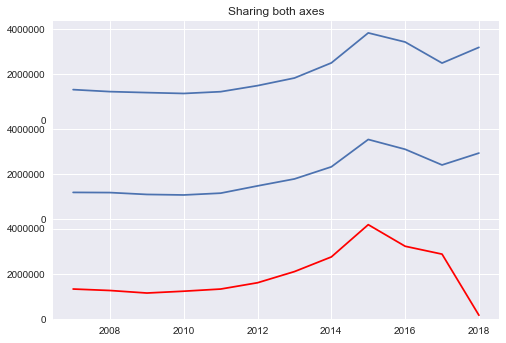

In [246]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y1)
ax1.set_title('Sharing both axes')
ax2.plot(x, y2)
ax3.plot(x, y3, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [256]:
# Obtaining the flow rates - Daily Production Data
data6 = pd.read_sql_query('''
            SELECT Apino, Yr, (Jan_oil/Jan_days) AS Jan, (Feb_oil/Feb_days) AS Feb, (Mar_oil/Mar_days) AS Mar, (Apr_oil/Apr_days) AS Apr,
            (May_oil/May_days) AS May, (Jun_oil/Jun_days) AS Jun, (Jul_oil/Jul_days) AS Jul, (Aug_oil/Aug_days) AS Aug,
            (Sep_oil/Sep_days) AS Sep, (Oct_oil/Oct_days) AS Oct, (Nov_oil/Nov_days) AS Nov, (Dec_oil/Dec_days) AS Dec
            
            FROM Production
            ORDER BY Jan_oil DESC
            ;''', conn)
data6.head(10)

,Apino,Yr,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,929103,2015,1245.0,822.0,610.0,483.0,401.0,331.0,289.0,256.0,225.0,203.0,206.0,187.0
1,562074,2014,1182.0,942.0,730.0,614.0,548.0,554.0,488.0,500.0,316.0,471.0,492.0,337.0
2,929117,2015,1121.0,752.0,616.0,512.0,429.0,368.0,328.0,298.0,238.0,290.0,239.0,108.0
3,562629,2016,1111.0,721.0,580.0,458.0,462.0,381.0,355.0,322.0,294.0,266.0,245.0,130.0
4,929488,2018,1109.0,952.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1930109,2015,1102.0,946.0,649.0,991.0,723.0,531.0,423.0,493.0,352.0,314.0,201.0,221.0
6,561926,2014,1101.0,1596.0,868.0,644.0,399.0,282.0,217.0,202.0,176.0,158.0,140.0,119.0
7,929033,2015,1086.0,674.0,509.0,400.0,339.0,289.0,256.0,229.0,190.0,106.0,196.0,193.0
8,935214,2018,1488.0,1577.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,928417,2012,1009.0,810.0,695.0,586.0,699.0,563.0,488.0,528.0,438.0,385.0,374.0,443.0
